In [1]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set the API endpoint URL
url = "https://api.covid19api.com/total/dayone/country/singapore"

In [3]:
# Make the API request and store the response
response = requests.get(url)

# Convert the response JSON data to a pandas DataFrame
df = pd.json_normalize(response.json())

In [4]:
# Extract the relevant columns from the DataFrame
df = df[["Confirmed", "Deaths", "Recovered", "Date"]]

In [15]:
df.tail()

,Date,Confirmed,Deaths,Recovered
1137,2023-03-05,2230868,1722,0
1138,2023-03-06,2230868,1722,0
1139,2023-03-07,2230868,1722,0
1140,2023-03-08,2235294,1722,0
1141,2023-03-09,2235294,1722,0


In [5]:
# Convert the "Date" column to a datetime object
df["Date"] = pd.to_datetime(df["Date"]).dt.date

In [6]:
# Group the data by date and calculate the cumulative sum of confirmed cases
df = df.groupby("Date").sum().reset_index()

In [8]:
# Convert the "Date" column to a numpy array
dates = df["Date"].values

In [19]:
# Convert the cases to numpy arrays
confirmed = df['Confirmed'].values
deaths = df['Deaths'].values
recovered = df['Recovered'].values

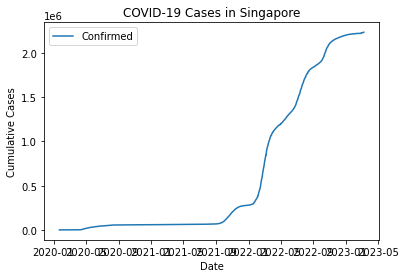

In [24]:
# Create a line graph of the cumulative number of confirmed cases over time
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.title("COVID-19 Cases in Singapore")
plt.plot(dates, confirmed, label="Confirmed")
plt.legend()
plt.show()

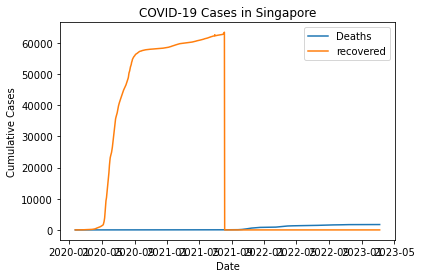

In [23]:
# Create a line graph of the cumulative number of deaths and recovered cases over time
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.title("COVID-19 Cases in Singapore")
plt.plot(dates, deaths, label="Deaths")
plt.plot(dates, recovered, label = "recovered")
plt.legend()
plt.show()